In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import torch
import torchvision.transforms as transforms

In [3]:
import motion

(17, 64, 48)
(17, 64, 48)
(17, 64, 48)
(17, 64, 48)
(17, 64, 48)
(17, 64, 48)
(17, 64, 48)
(17, 64, 48)
(17, 64, 48)


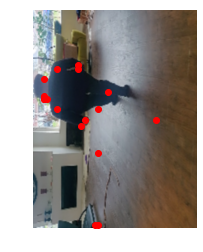

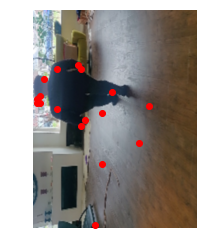

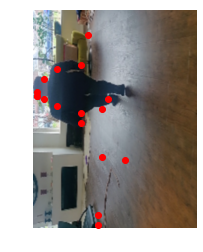

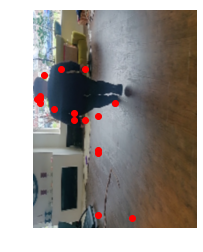

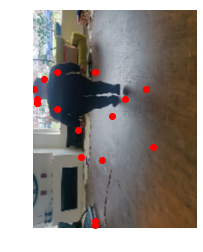

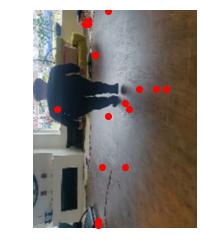

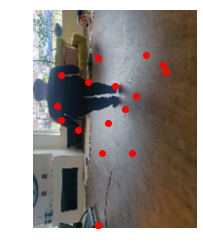

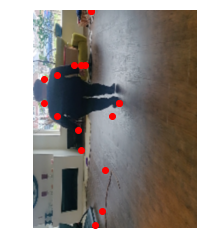

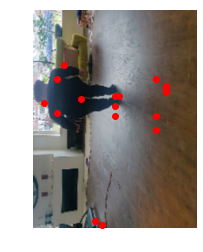

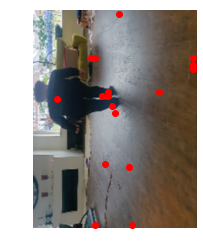

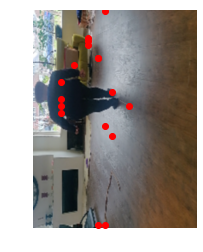

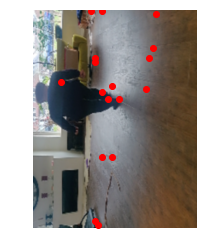

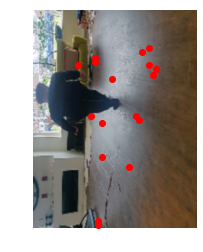

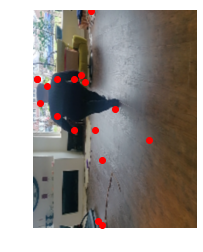

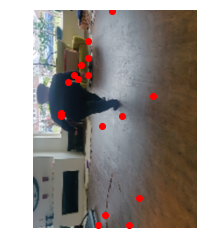

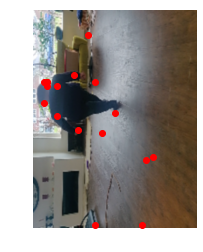

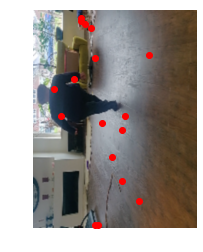

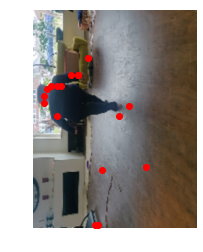

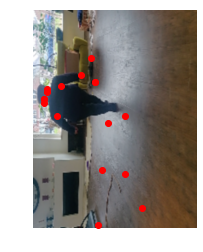

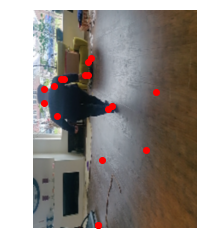

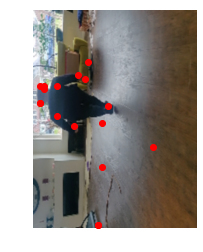

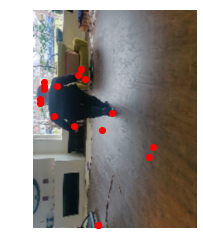

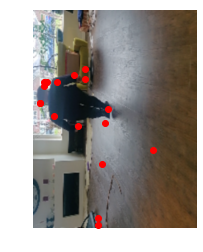

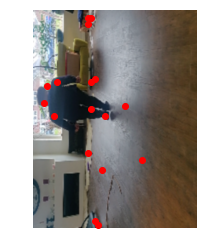

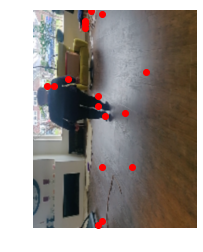

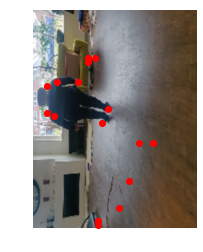

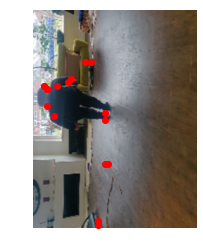

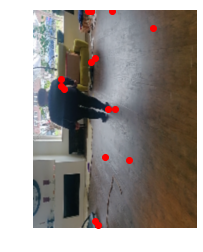

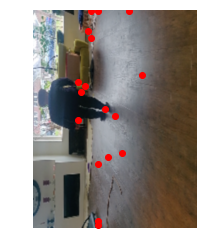

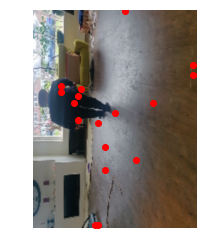

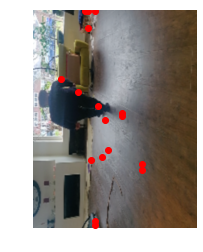

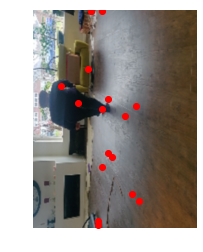

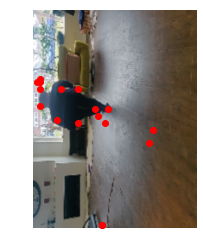

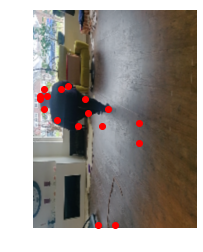

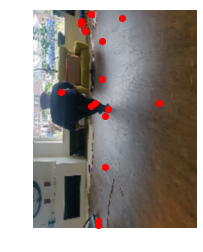

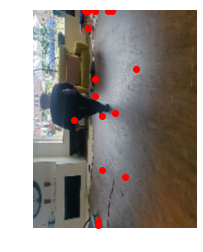

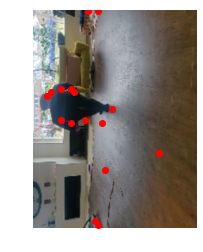

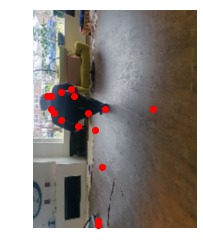

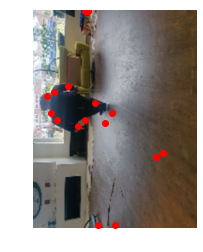

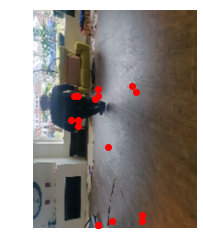

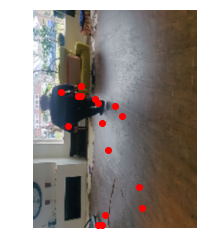

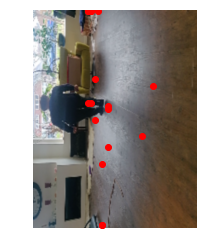

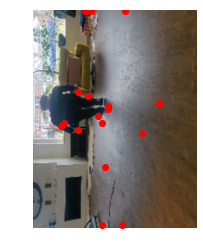

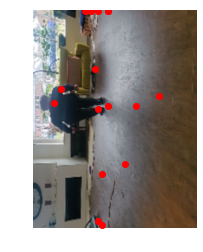

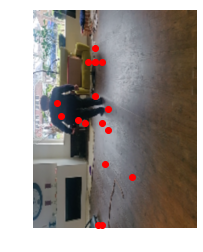

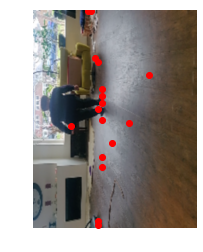

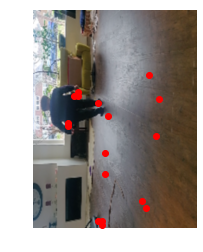

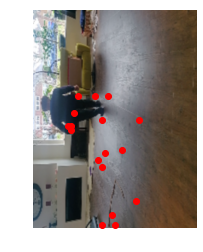

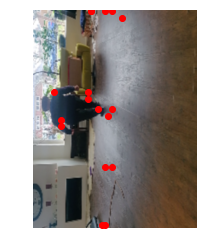

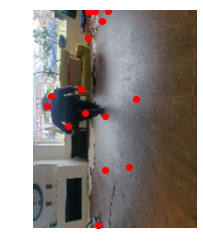

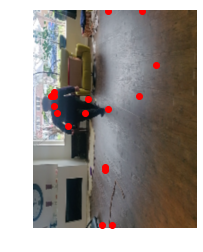

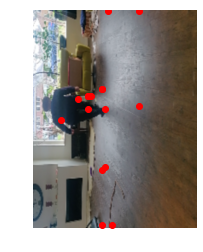

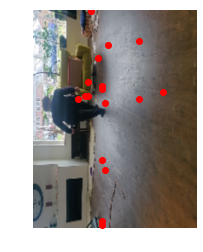

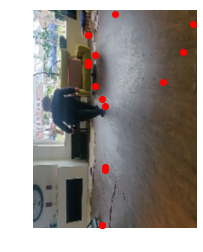

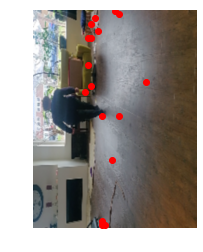

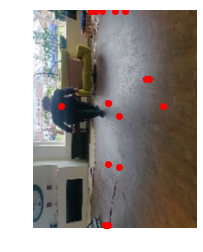

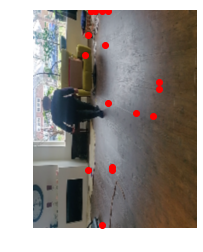

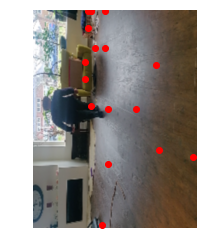

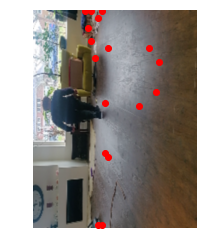

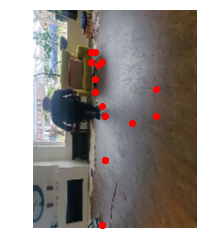

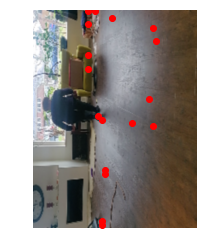

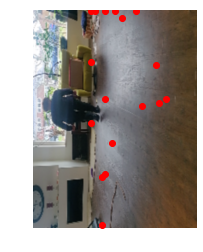

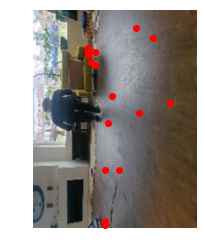

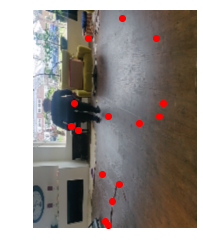

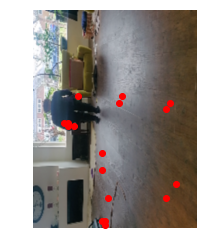

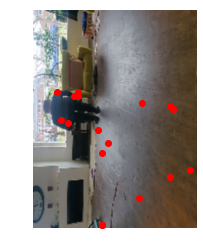

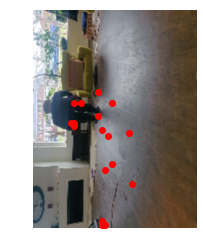

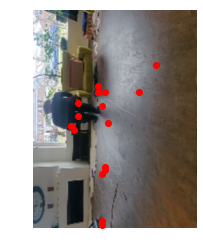

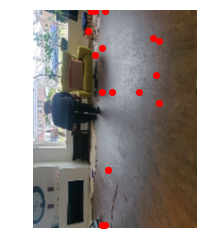

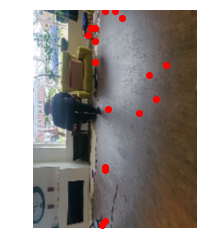

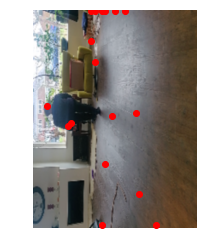

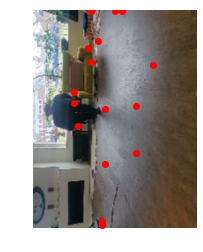

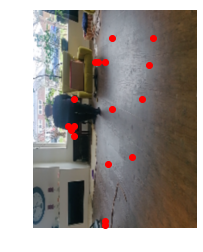

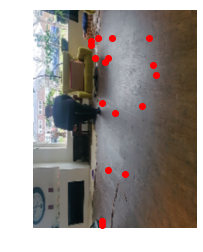

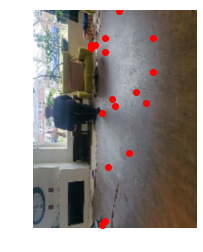

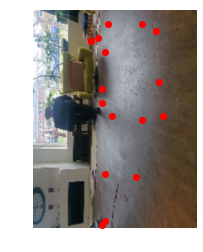

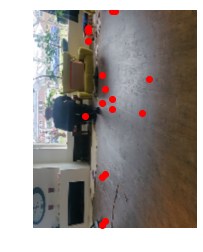

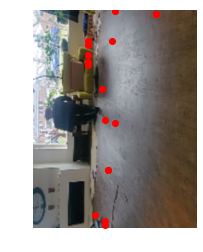

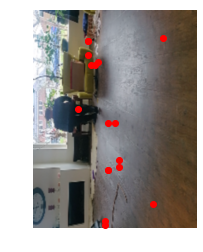

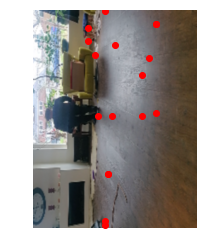

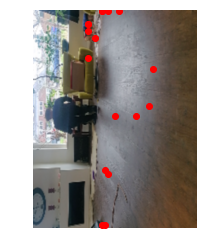

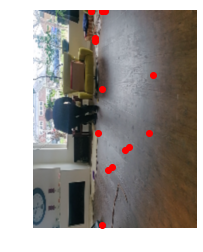

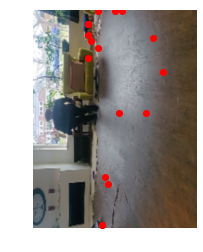

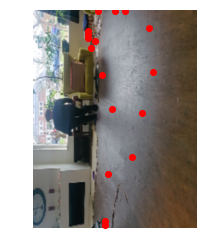

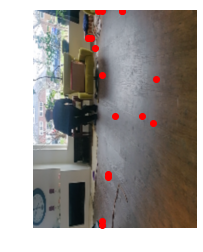

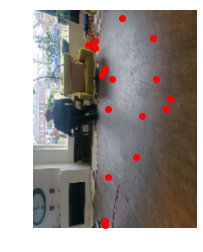

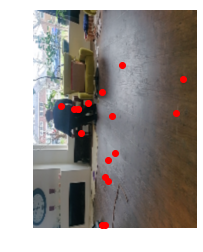

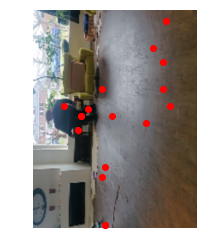

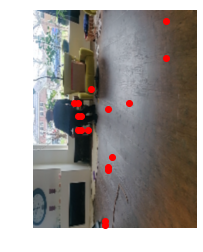

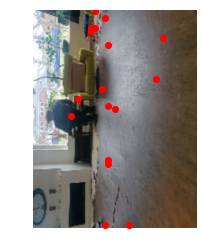

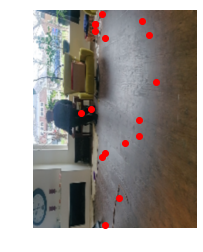

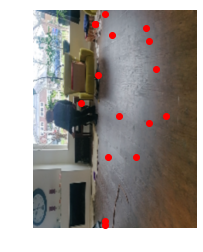

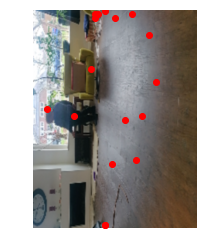

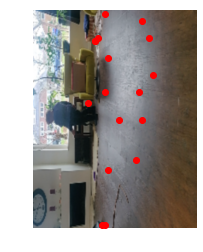

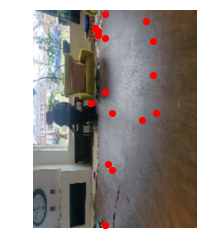

In [ ]:


import motion
from motion import config
 
def get_video_array(video_dir):

    cap = cv2.VideoCapture(video_dir)
    frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    buf = np.empty(
        (frameCount, config.resize["height"], config.resize["width"], 3),
        np.dtype("uint8"),
    )

    fc = 0
    ret = True

    while fc < frameCount and ret:
        ret, b = cap.read()
        buf[fc] = data_resize(b)
        fc += 1

    cap.release()
    return buf


def data_resize(data_array):
    return cv2.resize(data_array, (config.resize["width"], config.resize["height"]))


def main(video_dir):

    # Create a VideoCapture object and read from input file
    # If the input is the camera, pass 0 instead of the video file name
    array = get_video_array(video_dir)
    pred = motion.get_pose(array)

    video = motion.plot_pose(array, pred)
    
main('coco/oma.mp4')